## Import required libraries

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

## Store data, labels in the list

In [10]:
data = []
labels = []
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [11]:
cur_path

'C:\\Users\\win10\\Desktop\\Deep learning\\cnn\\trafic signals detection'

## Preprocess the images

In [13]:
for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

## Converting lists into numpy arrays

In [14]:
data = np.array(data)
labels = np.array(labels)

## Save Labels & Data for future use

In [17]:
# os.mkdir('training')

np.save('C:/Users/win10/Desktop/Deep learning/cnn/trafic signals detection/data',data)
np.save('C:/Users/win10/Desktop/Deep learning/cnn/trafic signals detection/target',labels)

## Load data & Labels

In [18]:
data=np.load('C:/Users/win10/Desktop/Deep learning/cnn/trafic signals detection/data.npy')
labels=np.load('C:/Users/win10/Desktop/Deep learning/cnn/trafic signals detection/target.npy')

In [19]:
print(data.shape, labels.shape)

(56321, 30, 30, 3) (56321,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(45056, 30, 30, 3) (11265, 30, 30, 3) (45056,) (11265,)


## Convert labels to onehot encoding

In [22]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

## Now it's time to build the model

In [23]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [24]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
1408/1408 [==============================] - 172s 122ms/step - loss: 0.2092 - accuracy: 0.9472 - val_loss: 0.0517 - val_accuracy: 0.9876
Epoch 2/5
1408/1408 [==============================] - 173s 123ms/step - loss: 0.2238 - accuracy: 0.9452 - val_loss: 0.0910 - val_accuracy: 0.9781
Epoch 3/5
1408/1408 [==============================] - 185s 132ms/step - loss: 0.2074 - accuracy: 0.9496 - val_loss: 0.0497 - val_accuracy: 0.9877
Epoch 4/5
1408/1408 [==============================] - 181s 129ms/step - loss: 0.2202 - accuracy: 0.9481 - val_loss: 0.0469 - val_accuracy: 0.9894
Epoch 5/5
1408/1408 [==============================] - 172s 122ms/step - loss: 0.2123 - accuracy: 0.9513 - val_loss: 0.0617 - val_accuracy: 0.9850


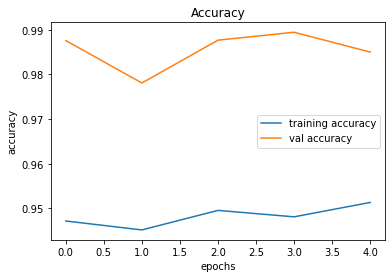

In [28]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

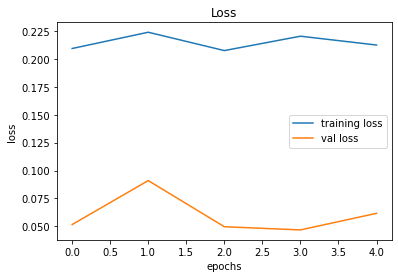

In [29]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

In [30]:
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [26]:
X_test, label = testing('Test.csv')

In [27]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

## Accuracy with the test data

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9403008709422012


## Save the model

In [32]:
model.save("training/TSR.h5")

## Load the Model

In [2]:
import os
os.chdir(r'D:\Traffic_Sign_Recognition')
from keras.models import load_model
model = load_model('./training/TSR.h5')

In [1]:
# Classes of trafic signs
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model
model = load_model('training/TSR.h5')
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }
top=tk.Tk()
top.geometry('800x600')
top.title('Trafic signal detection')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    image = image/255
    pred = model.predict_classes([image])[0]
    sign = classes[pred]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="trafic signal detection",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\win10\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-1-e4197de5a4c2>", line 71, in <lambda>
    command=lambda: classify(file_path),
  File "<ipython-input-1-e4197de5a4c2>", line 65, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 459, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1629, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py",

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\win10\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-1-e4197de5a4c2>", line 71, in <lambda>
    command=lambda: classify(file_path),
  File "<ipython-input-1-e4197de5a4c2>", line 65, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 459, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1629, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py",

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\win10\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-1-e4197de5a4c2>", line 71, in <lambda>
    command=lambda: classify(file_path),
  File "<ipython-input-1-e4197de5a4c2>", line 65, in classify
    pred = model.predict_classes([image])[0]
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py", line 459, in predict_classes
    proba = self.predict(x, batch_size=batch_size, verbose=verbose)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py", line 1629, in predict
    tmp_batch_outputs = self.predict_function(iterator)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "C:\Users\win10\anaconda3\lib\site-packages\tensorflow\python\eager\def_function.py",

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image,Y_pred

Predicted traffic sign is:  Bumpy road


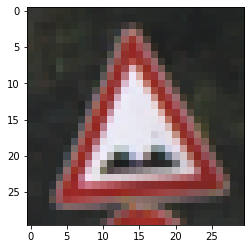

In [13]:
plot,prediction = test_on_img(r'D:\Traffic_Sign_Recognition\Test\00500.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()